<a href="https://colab.research.google.com/github/MaryBakatova/-/blob/main/2.1%20%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD%D1%8B%20%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Визуализация данных 1**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#загрузка набора данных iris
iris = load_iris()

#создание DF с русскими названиями признаков
df = pd.DataFrame(data=iris.data, columns=[
    'Длина чашелистика',
    'Ширина чашелистика',
    'Длина лепестка',
    'Ширина лепестка'
])
df['вид'] = iris.target_names[iris.target]

#вывод информации в структуре данных
print('Структура набора данных:')
print(df.info())

print('\nПервые 5 строк данных:')
print(df.head(10))

Структура набора данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина чашелистика   150 non-null    float64
 1   Ширина чашелистика  150 non-null    float64
 2   Длина лепестка      150 non-null    float64
 3   Ширина лепестка     150 non-null    float64
 4   вид                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Первые 5 строк данных:
   Длина чашелистика  Ширина чашелистика  Длина лепестка  Ширина лепестка  \
0                5.1                 3.5             1.4              0.2   
1                4.9                 3.0             1.4              0.2   
2                4.7                 3.2             1.3              0.2   
3                4.6                 3.1             1.5              0.2   
4                5.0                 3.6             1.4      

Структура набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Длина чашелистика                  150 non-null    float64
 1   Ширина чашелистика                 150 non-null    float64
 2   Длина лепестка                     150 non-null    float64
 3   Ширина лепестка                    150 non-null    float64
 4   вид                                150 non-null    object 
 5   Общий размер цветка                150 non-null    float64
 6   Отношение длины к ширине лепестка  150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB
None

Статистические показатели по видам:
           Длина чашелистика                 Ширина чашелистика             \
                        mean   std  min  max               mean   std  min   
вид                                           

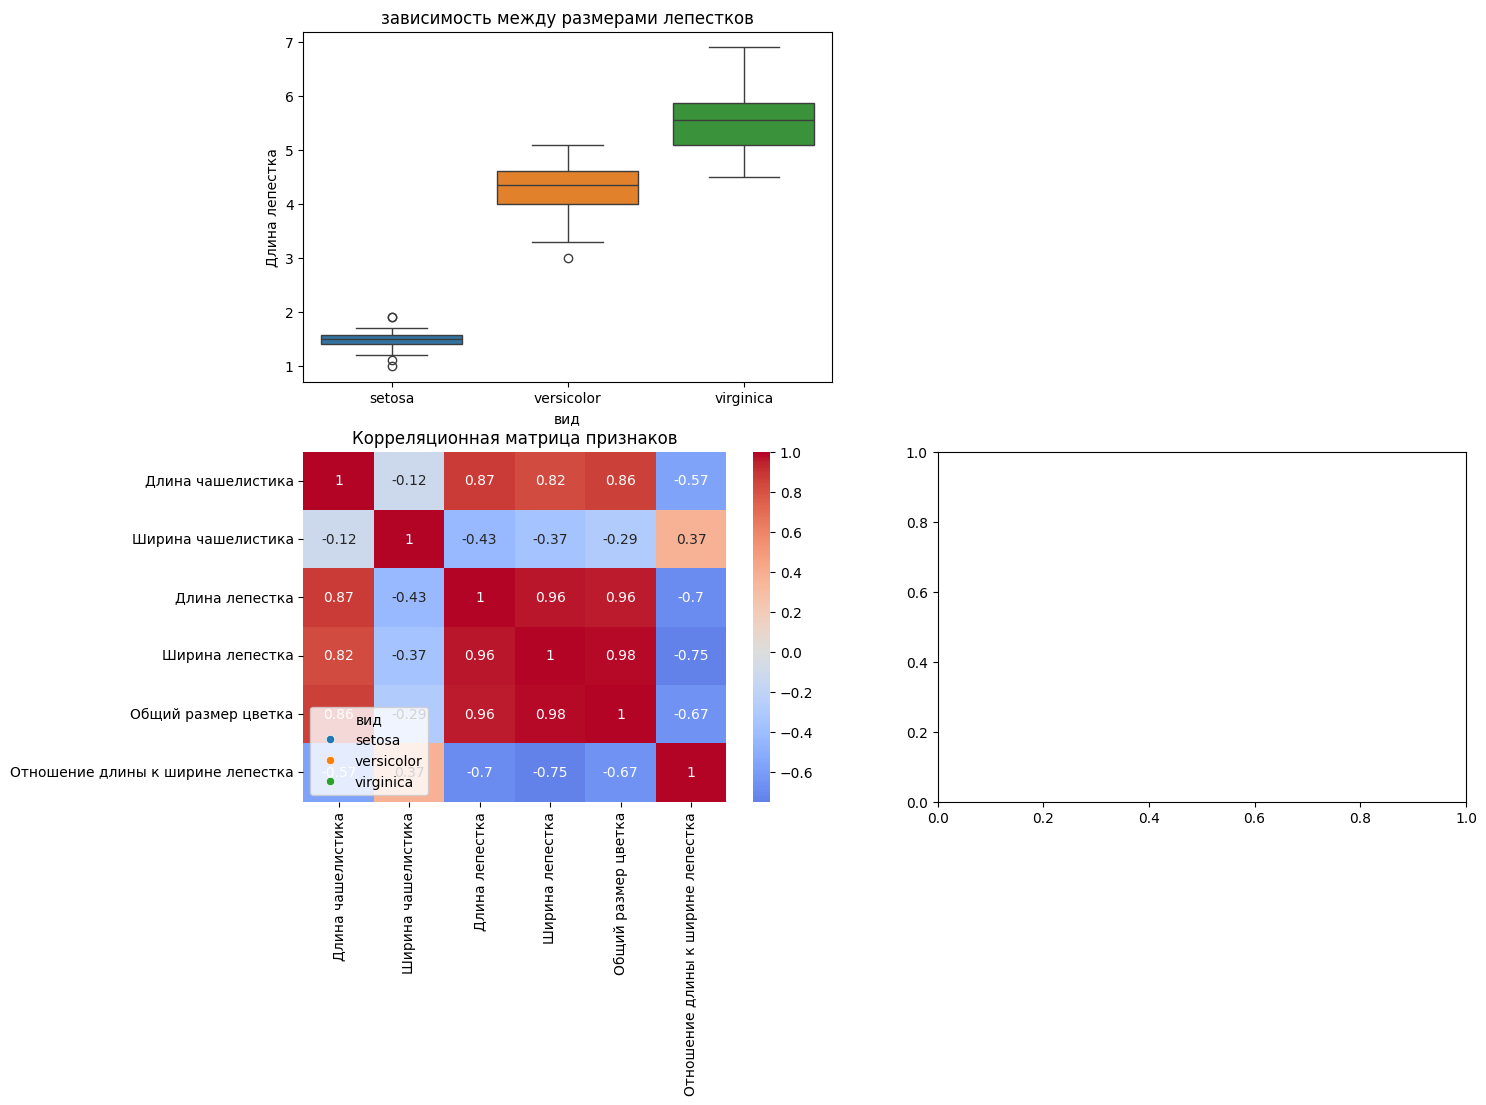

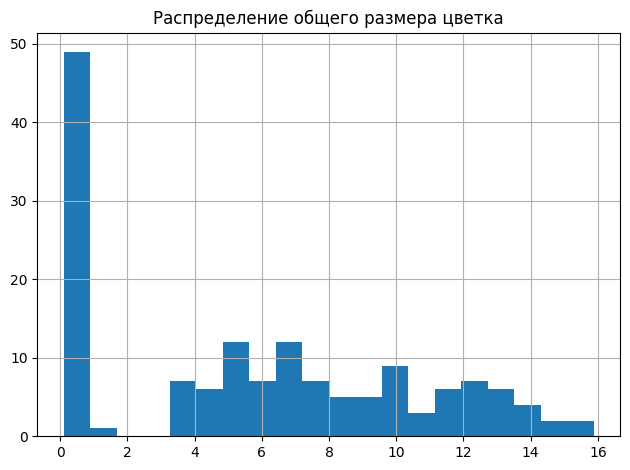


Корреляция между новыми признаками:
                                   Общий размер цветка  \
Общий размер цветка                              1.000   
Отношение длины к ширине лепестка               -0.666   

                                   Отношение длины к ширине лепестка  
Общий размер цветка                                           -0.666  
Отношение длины к ширине лепестка                              1.000  


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#загрузка набора данных iris
iris = load_iris()

#создание DF с русскими названиями признаков
df = pd.DataFrame(data=iris.data, columns=[
    'Длина чашелистика',
    'Ширина чашелистика',
    'Длина лепестка',
    'Ширина лепестка'
])
df['вид'] = iris.target_names[iris.target]

#добавим новые признаки (новые колонки и их значения)
df['Общий размер цветка'] = df['Длина лепестка'] * df['Ширина лепестка']
df['Отношение длины к ширине лепестка'] = df['Длина лепестка'] / df['Ширина лепестка']

# расчет стат показателей по видам и округляем второе значение после запятой до 2х знаков - round (2)
stat_by_species = df.groupby('вид').agg({
    'Длина чашелистика': ['mean', 'std', 'min', 'max'],
    'Ширина чашелистика': ['mean', 'std', 'min', 'max'],
    'Длина лепестка': ['mean', 'std', 'min', 'max'],
    'Ширина лепестка': ['mean', 'std', 'min', 'max']
}).round(2)

print('Структура набора данных')
print(df.info())

print('\nСтатистические показатели по видам:')
print(stat_by_species)

print('\nПервые 5 строк данных')
print(df.head())

# создание визуализации и определяем размер
plt.figure(figsize=(15,10))

# график распределения признаков
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='вид', y='Длина лепестка', hue='вид')
plt.title('зависимость между размерами лепестков')

# график рассеивания
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Длина лепестка', y='Ширина лепестка', hue='вид') #hue - легенда
plt.title('Зависимость между размерами лепестков')

# корреляционная матрица. несколько видов
# показывает зависимость: красный - прямая зависимость.если увеличивается один признак, то увеличивается второй.
# синий - обратная зависимость: если увеличивается один признак, уменьшается другой
# Чем ближе к 0, тем взаимосвязь слабее. ближе к 1, сильнее прямая связь, ближе к -1, то сильнее обратная связь
plt.subplot(2, 2, 3)
corr_matrix = df.drop('вид', axis = 1).corr()
# annot = True  значит сделать аннотацию, то есть подписи к ячейкам
# coolwarm - отображение цветовой карты (горячее холодное: красное - синее)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')

# гистограммы распределения новых признаков
plt.subplot(2, 2, 4)
df.hist(column='Общий размер цветка', bins=20)
plt.title('Распределение общего размера цветка')

plt.tight_layout() #расположить все графики симметрично
plt.show() # показать все графики


# анализ взаимосвязей между новыми признаками
correlation_new_features = df[['Общий размер цветка', 'Отношение длины к ширине лепестка']].corr()
print('\nКорреляция между новыми признаками:')
print(correlation_new_features.round(3))


# **Визуализация данных 2**

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Матрица конфузии
[[40  3]
 [ 1 70]]


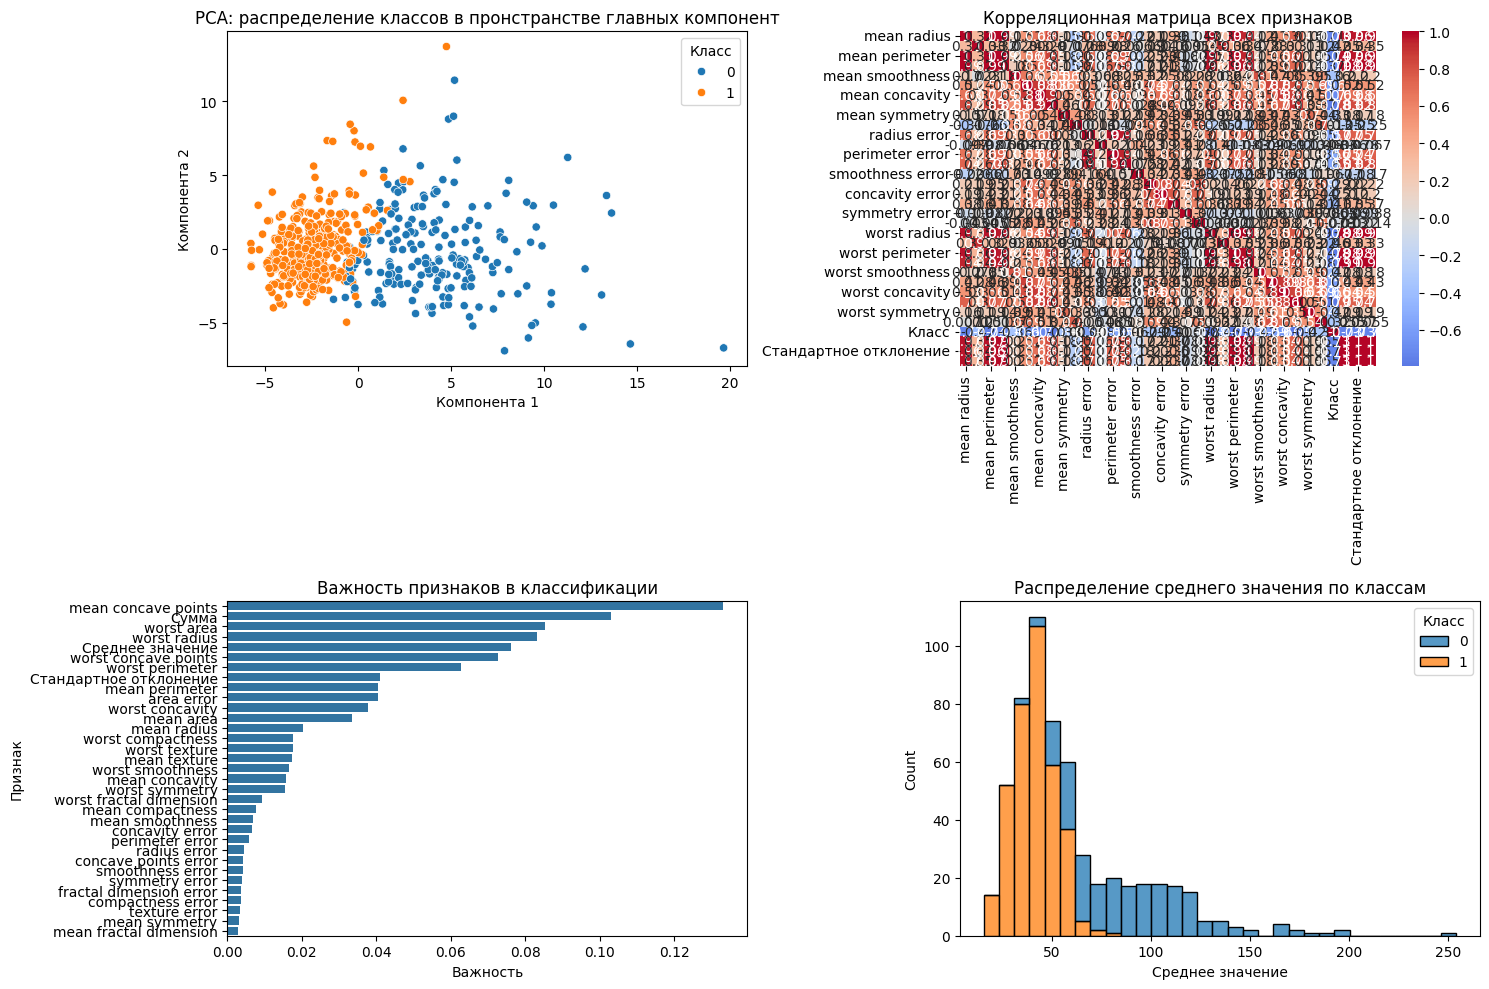


Статистические показатели по классам:
      Среднее значение                         Стандартное отклонение  \
                  mean     std    min      max                   mean   
Класс                                                                   
0               91.231  33.947  36.50  254.259                299.449   
1               41.317  10.580  15.68   82.930                125.705   

                                  
           std      min      max  
Класс                             
0      119.858  108.263  856.541  
1       36.309   41.155  270.500  
\Топ 5 признаков по важности:
                Признак  Важность
7   mean concave points  0.132941
32                Сумма  0.102910
23           worst area  0.085242
20         worst radius  0.083214
30     Среднее значение  0.076275


In [10]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split # для ML - деление выборки на 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # проверка метрик на точность, построим отчет и матрицу
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# загрузка и подготовка данных
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['Класс'] = cancer.target

# добавление продвинутых признаков
df['Среднее значение'] = df.mean(axis=1) #среднее значение по одной колонке
df['Стандартное отклонение'] = df.std(axis=1)
df['Сумма'] = df.sum(axis=1)

# разделение данных на обучающую и тестовую выборки
# на train - учимся, на test - проверяемся
X = df.drop('Класс', axis=1)
y = df['Класс']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #тестируем на 20% данных(test_size) тренируемся на 80%
# данные для теста забираются рандомно


# масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# построение конвейера без РСА внутри
pipe = Pipeline([
    ('scaler', StandardScaler()), # шкалирует данные
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
]) #классифицирование данных

# обучение модели
pipe.fit(X_train, y_train)

# оценка модели
y_pred = pipe.predict(X_test)
print('Отчет о классификации:')
print(classification_report(y_test, y_pred))
print('\nМатрица конфузии')
print(confusion_matrix(y_test, y_pred))

# визуализация результата РСА
pca_results = pca.transform(scaler.transform(X))
pca_df = pd.DataFrame(pca_results, columns=['Компонента 1', 'Компонента 2'])
pca_df['Класс'] = df['Класс']

plt.figure(figsize=(15, 10))

# график РСА
plt.subplot(2, 2, 1)
sns.scatterplot(data=pca_df, x='Компонента 1', y='Компонента 2', hue='Класс')
plt.title('PCA: распределение классов в пронстранстве главных компонент')

# матрица корреляции с новыми признаками
plt.subplot(2, 2, 2)
numeric_cols = df.select_dtypes(include=['int64', 'float64',]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица всех признаков')

# график важности признаков
plt.subplot(2, 2, 3)
feature_importance = pipe.named_steps['classifier'].feature_importances_
features_in_model = X.columns.tolist()
feature_df = pd.DataFrame({
    'Признак': features_in_model,
    'Важность': feature_importance
}).sort_values('Важность', ascending=False)
sns.barplot(data=feature_df, x='Важность', y='Признак')
plt.title('Важность признаков в классификации')

# график распределения новых признаков
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Среднее значение', hue='Класс', multiple='stack')
plt.title('Распределение среднего значения по классам')

plt.tight_layout()
plt.show()

# расчет дополнительных стат показателей
print('\nСтатистические показатели по классам:')
print(df.groupby('Класс').agg({
    'Среднее значение': ['mean', 'std', 'min', 'max'],
    'Стандартное отклонение': ['mean', 'std', 'min', 'max']
}).round(3))

# анализ вклада признаков
print('\Топ 5 признаков по важности:')
print(feature_df.head().to_string())